In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from benchmarking.data import dataset_loaders, DatasetGroup
from benchmarking.run_benchmarks import run_eval
from benchmarking.utils import combine_method_overviews_from_csv

In [5]:
data_path = Path(module_path, 'hnne_datasets')
## Load small, medium or large datasets, see ./hnne/benchmarking/data.py
loaders = dataset_loaders(dataset_group=DatasetGroup.small)
loaders.keys()

dict_keys(['coil_20', 'shuttle', 'mnist', 'fmnist'])

# Set benchmarking settings

In [19]:
dataset_group = DatasetGroup.small

hnne_v2 = True
v1_behaviour = False

start_cluster_view=10
v2_size_threshold=500

bs =  '_v1_move_behaviour' if  v1_behaviour else ''
experiment_name = f'hnne_v2_packlevel_{start_cluster_view}-{v2_size_threshold}_clusters{bs}' if hnne_v2 else 'hnne_v1'

output_directory = Path(module_path, "benchmark_results", str(dataset_group))

In [20]:
experiment_name

'hnne_v2_packlevel_10-500_clusters'

### run benchmark

Loading coil_20...
Finch time: 0.2605229169712402, projection time: 3.4782070000073873
Validating coil_20 on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 34.81it/s]


Exporting projection plots...
Loading shuttle...
[INFO]: The required start_cluster_view is smaller than the default top level of used FINCH hierarchy i.e. 12 clusters. Please set this using prefered_num_clust when initializing HNNE (prefered_num_clust=None).
Finch time: 1.515579707978759, projection time: 1.5330742500373162
Validating shuttle on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:30<00:00,  1.30it/s]


Exporting projection plots...
Loading mnist...
Finch time: 2.4833806669921614, projection time: 3.128831916023046
Validating mnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:33<00:00,  1.20it/s]


Exporting projection plots...
Loading fmnist...
Finch time: 2.328938249964267, projection time: 2.4162557080271654
Validating fmnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:32<00:00,  1.21it/s]


Exporting projection plots...


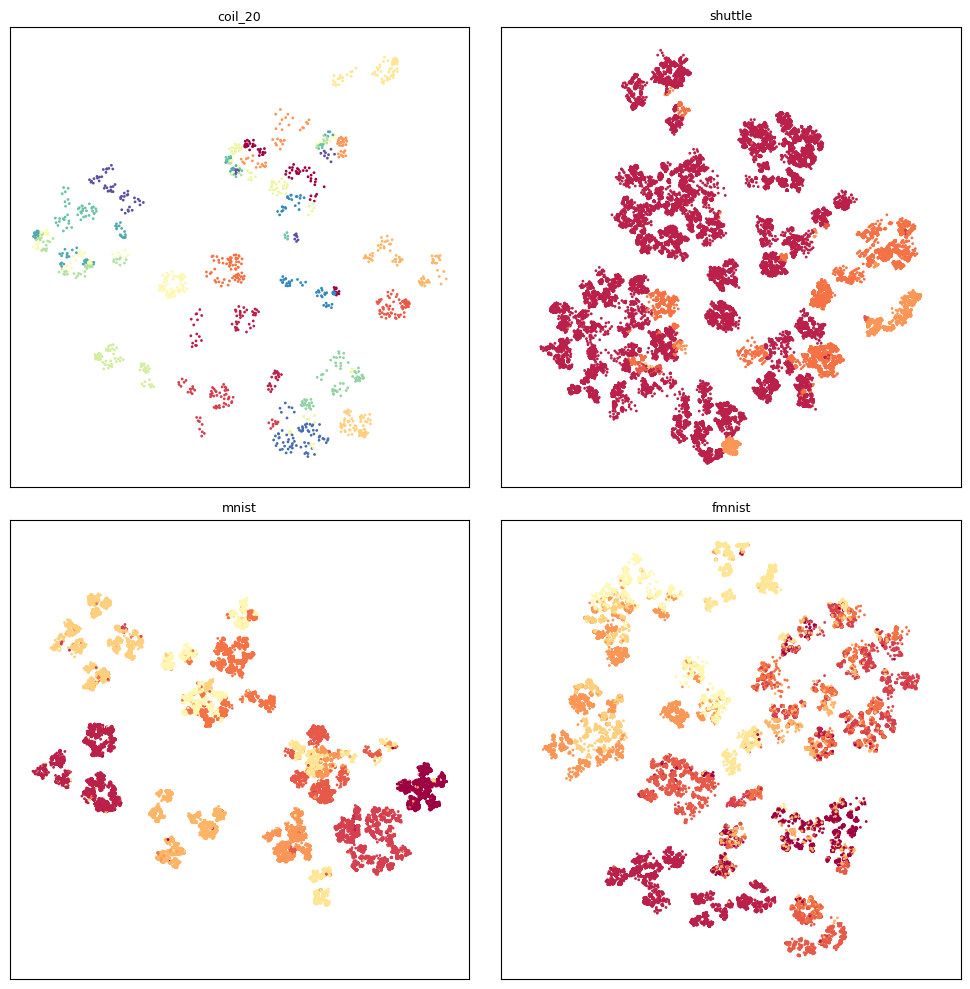

In [22]:
scores, plt = run_eval(
                data_path=data_path,
                dataset_group=dataset_group,
                n_components=2,
                distance="cosine",
                radius=0.4,
                ann_threshold=20000,
                preliminary_embedding="pca",
                validate_only_1nn=False,     
                compute_trustworthiness=True,
                random_state=42,
                verbose=False,
            
                # hnne v2 params
                prefered_num_clust= None,
                hnne_v2=hnne_v2,
                v1_behaviour = v1_behaviour,
                v2_k=1,
                start_cluster_view=start_cluster_view,
                v2_size_threshold=v2_size_threshold,
                # save params
                save_experiment=True,
                plot_projection=True,            
                experiment_name=experiment_name,
                output_directory=output_directory,
                points_plot_limit =5000_000,
                figsize=(5, 5),
                skip_done=False,
                scale_data=False,
)

In [23]:
print(scores.to_string())

           KNN accuracy                                                                                     
                   1-nn            3-nn            5-nn           10-nn trustworthiness proj_time finch_time
dataset                                                                                                     
coil_20  0.945 (±0.018)  0.958 (±0.016)  0.946 (±0.019)  0.925 (±0.018)        0.989720        3s     260 ms
shuttle  0.996 (±0.001)  0.996 (±0.001)  0.996 (±0.001)  0.995 (±0.001)        0.966921        1s         1s
mnist    0.950 (±0.002)  0.963 (±0.002)  0.964 (±0.002)  0.962 (±0.002)        0.979003        3s         2s
fmnist   0.809 (±0.006)  0.833 (±0.004)  0.838 (±0.005)  0.839 (±0.005)        0.954929        2s         2s


## display a combined overview of diffefnet run h-NNE variants

In [24]:
method_csvs = [
    ("hnne v1", Path(output_directory, "hnne_v1", "scores","all_datasets_scores.csv")),
    ("hnne v2", Path(output_directory, "hnne_v2_packlevel_10-500_clusters", "scores","all_datasets_scores.csv")),
    ("hnne v2 (v1 move behaviour)", Path(output_directory, "hnne_v2_packlevel_10-500_clusters_v1_move_behaviour", "scores","all_datasets_scores.csv")),
     ]
output_csv_path = Path(output_directory,'combined_overview.csv')
combined_overview = combine_method_overviews_from_csv(
                                        method_csvs,
                                        output_csv_path,
                                        knn_cols=("1-nn", "10-nn"),
                                        trust_col="trustworthiness",
                                        proj_time_col="proj_time",
                                        knn_group_name="KNN accuracy",
                                    )

In [25]:
print(combined_overview.to_string())

         KNN acc (1-nn)                                             KNN acc (10-nn)                                             trustworthiness                                       proj_time                                    
                hnne v1         hnne v2 hnne v2 (v1 move behaviour)         hnne v1         hnne v2 hnne v2 (v1 move behaviour)         hnne v1   hnne v2 hnne v2 (v1 move behaviour)   hnne v1 hnne v2 hnne v2 (v1 move behaviour)
coil_20  0.960 (±0.014)  0.945 (±0.018)              0.944 (±0.020)  0.909 (±0.025)  0.925 (±0.018)              0.924 (±0.017)        0.987783  0.989720                    0.989854    541 ms      3s                          3s
fmnist   0.815 (±0.005)  0.809 (±0.006)              0.815 (±0.005)  0.841 (±0.005)  0.839 (±0.005)              0.841 (±0.005)        0.956779  0.954929                    0.954445        1s      2s                          4s
mnist    0.955 (±0.002)  0.950 (±0.002)              0.955 (±0.002)  0.963 (±0.002)  0.9